#### [PREV](2.OOP_Multi_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](4.OOP_Logistic_Regression.ipynb)

---

# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Step 2 - Import And Visualise The Data

In [3]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


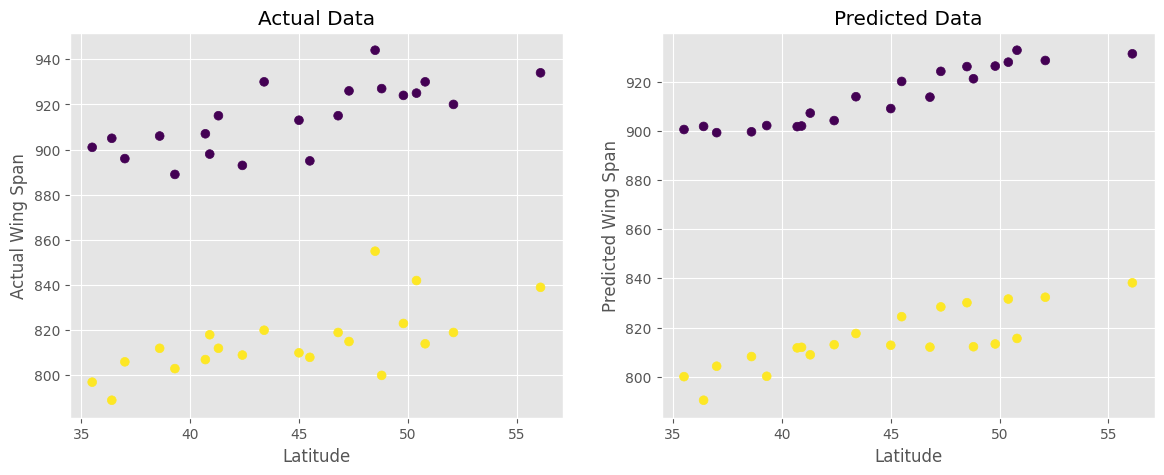

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [4]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [5]:
X_insects = insects[['continent', 'latitude', 'sex']]
y_insects = insects['wingsize']

# Create a 4 degree polynomial feature
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X_insects)

insects_regression.fit(poly_features, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [6]:
wing_size_predictions = insects_regression.predict(poly_features)

#### Step 5: Plot the Predictions

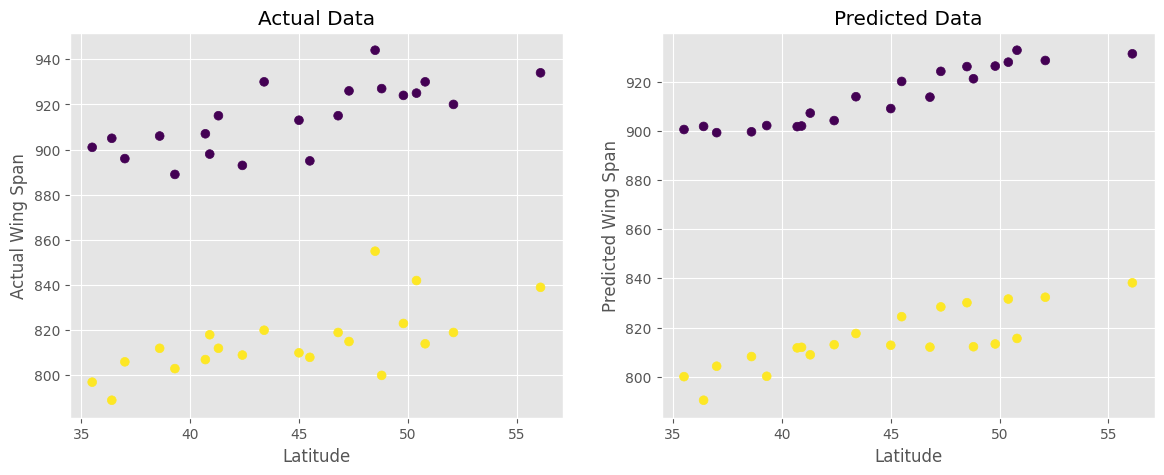

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()

#### Step 6: Evaluate The Model

In [14]:
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': y_insects - insects_regression.predict(poly_features).round(2)
})
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost:.5f}")
print(table)

The cost or average loss of this model is -0.00024
    Target  Predicted result   Loss
0      901        900.508035   0.49
1      896        899.231076  -3.23
2      906        899.593424   6.41
3      907        901.677734   5.32
4      898        901.938425  -3.94
5      893        904.143305 -11.14
6      913        909.027598   3.97
7      915        913.672390   1.33
8      927        921.152195   5.85
9      924        926.305146  -2.31
10     930        932.750671  -2.75
11     905        901.768436   3.23
12     889        902.115467 -13.12
13     915        907.180788   7.82
14     930        913.846704  16.15
15     895        920.062456 -25.06
16     926        924.159911   1.84
17     944        926.091463  17.91
18     925        927.897272  -2.90
19     920        928.578588  -8.58
20     934        931.298915   2.70
21     797        800.017198  -3.02
22     806        804.261752   1.74
23     812        808.189178   3.81
24     807        811.717952  -4.72
25     818   